In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

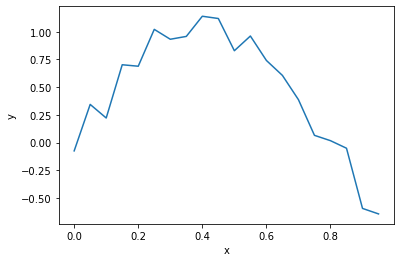

In [20]:
def create_X_poly_features(X, degree):
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    return X_poly

X = np.arange(0,1,0.05)
y = np.sin(4*X) + 0.1*np.random.normal(0,1,20)

plt.plot(X,y);
plt.xlabel('x');
plt.ylabel('y');

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [21]:
# sc = StandardScaler()
# X_train_norm = sc.fit_transform(Xtrain.reshape(-1, 1))
# X_test_norm = sc.fit_transform(Xtest.reshape(-1, 1))

X_train_poly = create_X_poly_features(Xtrain, 5)
X_test_poly = create_X_poly_features(Xtest, 5)

In [28]:
list_of_alphas = [1e-25, 1e-20, 1e-15, 1e-10, 1e-5, 1e-3,  1e-2, 1e-1, 1, 10, 100, 1000]
list_of_weights = []
for alpha in list_of_alphas:
    ridge = Ridge(alpha= alpha, max_iter= 100000)
    ridge.fit(X_train_poly,ytrain)
    list_of_weights.append(ridge.coef_)

c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69158e-26): result may not be accurate.
  overwrite_a=True).T
c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69158e-21): result may not be accurate.
  overwrite_a=True).T


Ridge Regression for 5 degree polynomial regression



 The coefficients at lambda = 1000 is still very small, but non zero: [ 0.         -0.00104255 -0.001581   -0.00171338 -0.00168281 -0.00159014]


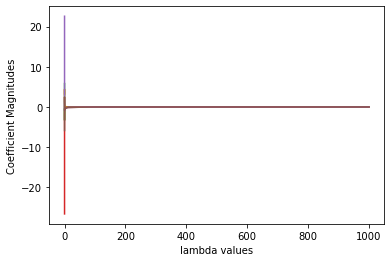

In [35]:
plt.plot(list_of_alphas, list_of_weights);
plt.xlabel('lambda values');
plt.ylabel('Coefficient Magnitudes');

print('Ridge Regression for 5 degree polynomial regression')
print(f'\n\n\n The coefficients at lambda = 1000 is still very small, but non zero: {list_of_weights[-1]}')

In [51]:
list_of_alphas = [1e-25, 1e-20, 1e-15, 1e-10, 1e-5, 1e-3,  1e-2, 1e-1, 0.2, 0.3, 0.4]
# list_of_alphas = [a for a in np.arange(1e-25,2e-1,)]
list_of_weights = []
for alpha in list_of_alphas:
    ridge = Lasso(alpha= alpha)
    ridge.fit(X_train_poly,ytrain)
    list_of_weights.append(ridge.coef_)

c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08660268287395849, tolerance: 0.00045735727974348253
  positive)
c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08660268287395846, tolerance: 0.00045735727974348253
  positive)
c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08660268287128954, tolerance: 0.00045735727974348253
  positive)
c:\users\ritika.s\anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did

Lasso Regression for 5 degree polynomial regression



 The coefficients at lambda = 1000 is still very small, but non zero: [ 0. -0. -0. -0. -0. -0.]


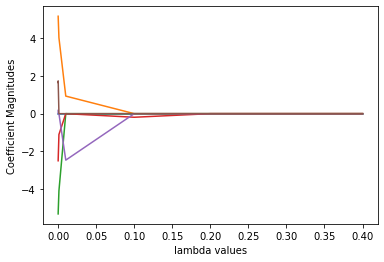

In [52]:
plt.plot(list_of_alphas, list_of_weights);
plt.xlabel('lambda values');
plt.ylabel('Coefficient Magnitudes');

print('Lasso Regression for 5 degree polynomial regression')
print(f'\n\n\n The coefficients at lambda = 1000 is still very small, but non zero: {list_of_weights[-1]}')